# Unsupervised Learning Assignment-2

Your task in this assignment is to:

1. Understand the two datasets provided and combine them in a meaningful way to make one dataset with useful features [1 mark]

2. Do appropriate EDA and preprocessing on the dataset you formed in part 1 [2 mark]

3. Cluster the data using Agglomerative clustering and find the appropriate number of clusters for the data using dendrogram [2 marks]

3. After finding the best clustering obtained for your data, try to interpret some/all of the clusters and derive some domain-specific insights out of the results [1 mark]

## Import Libraries
**Import pandas,seaborn, and the required libraries to work on this project.**

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

# Lets read the first file and check top 5 data

In [2]:
# Read input file
df = pd.read_csv("post_details.csv")
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0


# Lets read the second file and check top 5 data

In [3]:
# Read input file
df = pd.read_csv("post_reaction_details.csv")
df.head(5)

,status_id,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,432,92,3,1,1,0
1,246675545449582_1649426988507757,150,0,0,0,0,0
2,246675545449582_1648730588577397,204,21,1,1,0,0
3,246675545449582_1648576705259452,111,0,0,0,0,0
4,246675545449582_1645700502213739,204,9,0,0,0,0


# Lets merge the file

In [4]:
df = pd.concat(map(pd.read_csv, ['post_details.csv', 'post_reaction_details.csv']), ignore_index=True)
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529.0,512.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227.0,236.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# EDA and Basic Data Preprocessing and Preparation [Marks:2]

# Lets get the data information

In [5]:
print('='*50)
print("\nData Information\n")
print('='*50)
df.info()


Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         13994 non-null  object 
 1   status_type       6997 non-null   object 
 2   status_published  6997 non-null   object 
 3   num_reactions     6997 non-null   float64
 4   num_comments      6997 non-null   float64
 5   num_shares        6997 non-null   float64
 6   num_likes         6997 non-null   float64
 7   num_loves         6997 non-null   float64
 8   num_wows          6997 non-null   float64
 9   num_hahas         6997 non-null   float64
 10  num_sads          6997 non-null   float64
 11  num_angrys        6997 non-null   float64
dtypes: float64(9), object(3)
memory usage: 1.3+ MB


In [6]:
# From above we can see , we have 12 coloums, float and object data type, we need to handle this before feeding data in algo

# Lets get the data shape by using shape method

In [7]:
print('='*20)
print("Data shape")
print('='*20)
print(df.shape)

Data shape
(13994, 12)


# Lets describe the data

In [8]:
df.describe(include='all')

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,13994,6997,6997,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
unique,6997,4,6911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,246675545449582_1649696485147474,photo,11/19/2017 1:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,4242,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,224.951979,225.613977,40.269973,209.899814,12.755181,1.253251,0.698156,0.232671,0.110190
std,NaN,NaN,NaN,452.930082,892.863091,132.064065,439.595761,40.112024,8.726772,3.971462,1.481312,0.688678
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# From above we can see we have 13994 rows and 12 features in pur data set

In [10]:
# Generate descriptive statistics.
# Checking Min, Max, Mean, Std for all the columns
df.describe(percentiles=[.10, .25, .5, .75])

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,224.951979,225.613977,40.269973,209.899814,12.755181,1.253251,0.698156,0.232671,0.110190
std,452.930082,892.863091,132.064065,439.595761,40.112024,8.726772,3.971462,1.481312,0.688678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,6.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


# Getting the all columns

In [11]:
column=df.select_dtypes(include=['object','float64'])
for col in column:
    display(df[col].value_counts())

246675545449582_1649696485147474     2
725980084255106_831056807080766      2
725980084255106_821310368055410      2
725980084255106_821715704681543      2
725980084255106_822109934642120      2
                                    ..
246675545449582_264081010375702      2
246675545449582_264089710374832      2
246675545449582_264092513707885      2
246675545449582_264166627033807      2
1050855161656896_1050858841656528    2
Name: status_id, Length: 6997, dtype: int64

photo     4242
video     2333
status     359
link        63
Name: status_type, dtype: int64

11/19/2017 1:51    2
3/25/2018 2:34     2
12/18/2017 4:30    2
9/16/2017 7:55     2
8/3/2017 9:22      2
                  ..
9/6/2012 8:43      1
9/6/2012 9:01      1
9/6/2012 9:16      1
9/6/2012 23:17     1
9/10/2016 10:30    1
Name: status_published, Length: 6911, dtype: int64

1.0       131
2.0       124
14.0      121
0.0       121
3.0       116
         ... 
2826.0      1
2032.0      1
2154.0      1
1997.0      1
415.0       1
Name: num_reactions, Length: 1067, dtype: int64

0.0       2119
1.0        564
2.0        361
3.0        308
4.0        249
          ... 
1727.0       1
1794.0       1
2257.0       1
1671.0       1
4472.0       1
Name: num_comments, Length: 993, dtype: int64

0.0      3907
1.0       813
2.0       314
3.0       162
4.0       108
         ... 
454.0       1
508.0       1
510.0       1
549.0       1
219.0       1
Name: num_shares, Length: 501, dtype: int64

1.0       128
2.0       127
0.0       126
14.0      124
12.0      120
         ... 
2072.0      1
2826.0      1
2032.0      1
2154.0      1
953.0       1
Name: num_likes, Length: 1044, dtype: int64

0.0      4226
1.0       607
2.0       279
3.0       205
4.0       127
         ... 
326.0       1
385.0       1
329.0       1
188.0       1
157.0       1
Name: num_loves, Length: 229, dtype: int64

0.0      5295
1.0       701
2.0       344
3.0       211
4.0       134
         ... 
25.0        1
104.0       1
138.0       1
32.0        1
23.0        1
Name: num_wows, Length: 65, dtype: int64

0.0      5880
1.0       388
2.0       223
3.0       149
4.0        99
5.0        64
6.0        34
8.0        24
7.0        20
9.0        17
10.0       14
13.0       13
11.0       10
12.0        9
14.0        7
22.0        5
15.0        5
17.0        5
18.0        4
16.0        3
24.0        2
19.0        2
26.0        1
28.0        1
25.0        1
33.0        1
43.0        1
32.0        1
157.0       1
29.0        1
20.0        1
97.0        1
91.0        1
76.0        1
50.0        1
100.0       1
48.0        1
57.0        1
102.0       1
23.0        1
40.0        1
21.0        1
Name: num_hahas, dtype: int64

0.0     6399
1.0      317
2.0      113
3.0       63
4.0       37
5.0       14
8.0       12
6.0       11
10.0       6
7.0        6
19.0       3
17.0       2
13.0       2
23.0       2
28.0       1
22.0       1
51.0       1
21.0       1
37.0       1
11.0       1
46.0       1
12.0       1
14.0       1
9.0        1
Name: num_sads, dtype: int64

0.0     6577
1.0      275
2.0       71
3.0       35
4.0       17
5.0        9
6.0        4
8.0        3
31.0       1
12.0       1
7.0        1
19.0       1
10.0       1
9.0        1
Name: num_angrys, dtype: int64

In [12]:

#ProfileReport(df)

# Data Cleaning

In [13]:
#Checking for null Values

In [14]:
#Check the null values
df.isnull().sum()

status_id              0
status_type         6997
status_published    6997
num_reactions       6997
num_comments        6997
num_shares          6997
num_likes           6997
num_loves           6997
num_wows            6997
num_hahas           6997
num_sads            6997
num_angrys          6997
dtype: int64

# It is clear that there is no null values

# In order to calculate distances for hierarchical cluestering, all features must be in numeric format.
# Since some of the data is in string format, we need to convert it into numeric, lets do that now, I will be converting status_type and status_published as numeirc

In [15]:
df['status_type'] = pd.to_numeric(df['status_type'],errors='coerce')
df['status_published'] = pd.to_numeric(df['status_published'],errors='coerce')

In [16]:
# Checking for Duplicates
print("Number of duplicate values in the dataset is : ", df.duplicated().sum())

Number of duplicate values in the dataset is :  0


In [17]:
# now again lets checking column wise null values
df.isnull().any()
df.isnull().sum()

status_id               0
status_type         13994
status_published    13994
num_reactions        6997
num_comments         6997
num_shares           6997
num_likes            6997
num_loves            6997
num_wows             6997
num_hahas            6997
num_sads             6997
num_angrys           6997
dtype: int64

In [18]:
# checking overall null value count
df.isnull().sum().sum()

90961

# We can see we have huge null vaalues after converting data into numeric. we will handle iy by filling it with zero

In [19]:
df.fillna(0,inplace = True)

# I am filling NAN with zero instead of removing it

In [20]:
# checking overall null value count
df.isnull().sum().sum()

0

In [21]:
# After handling the null value we can see we have zero null values

# Outliers

In [22]:
#Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions.
#let's first visualize our data and decide on what to do with the outliers

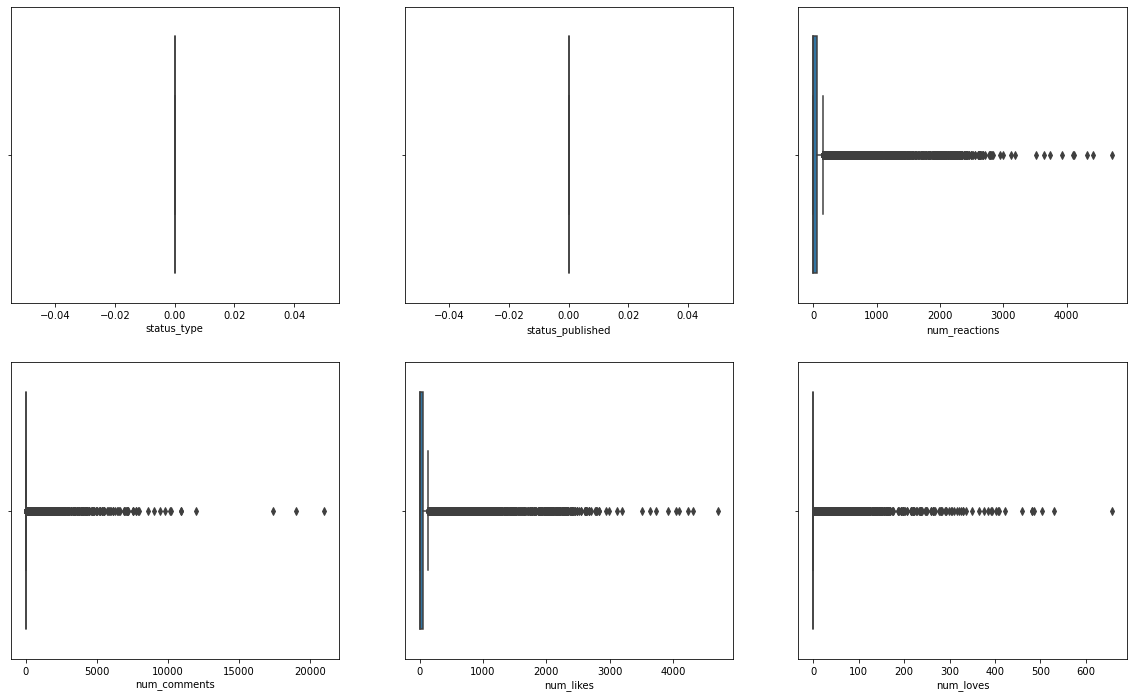

In [23]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df['status_type'])
plt.subplot(2,3,2)
sns.boxplot(df['status_published'])
plt.subplot(2,3,3)
sns.boxplot(df['num_reactions'])
plt.subplot(2,3,4)
sns.boxplot(df['num_comments'])
plt.subplot(2,3,5)
sns.boxplot(df['num_likes'])
plt.subplot(2,3,6)
sns.boxplot(df['num_loves'])

plt.show()



<AxesSubplot:xlabel='num_angrys'>

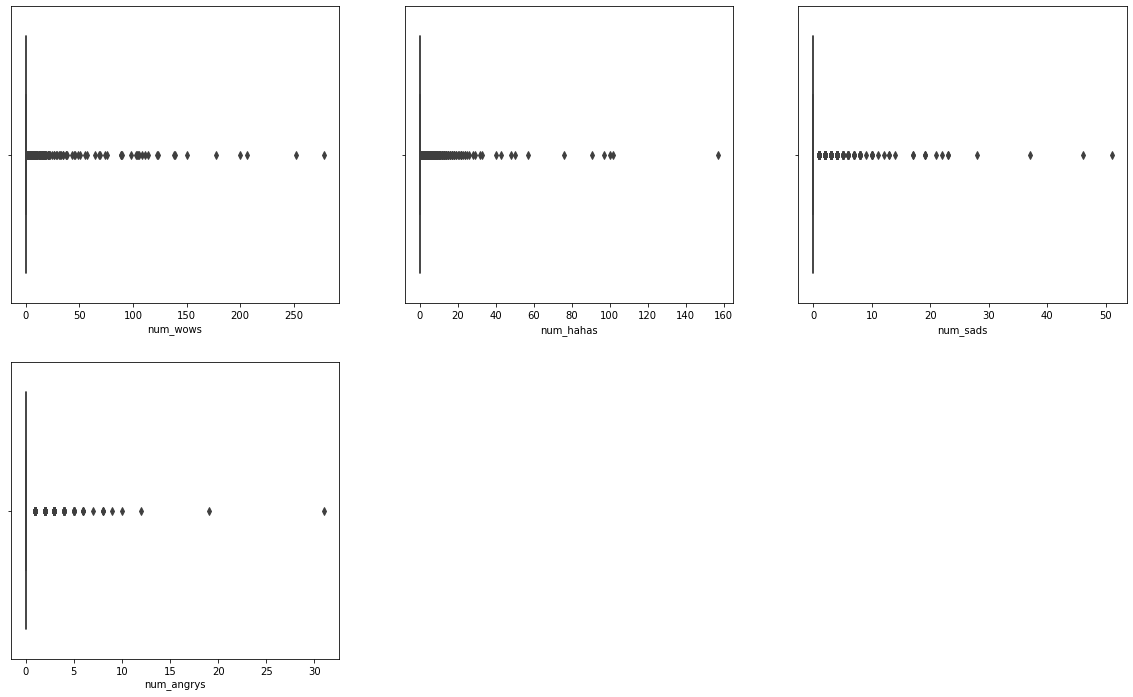

In [24]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df['num_wows'])
plt.subplot(2,3,2)
sns.boxplot(df['num_hahas'])
plt.subplot(2,3,3)
sns.boxplot(df['num_sads'])
plt.subplot(2,3,4)
sns.boxplot(df['num_angrys'])

# We can see there are many outliers but we will not remove it as it can contaains some important information

# First, let's try to undertand status_type distribution


In [25]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled

array([[0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=data_scaled,x="num_reactions",color="red")
plt.title("status_type Distribution ")
plt.show()

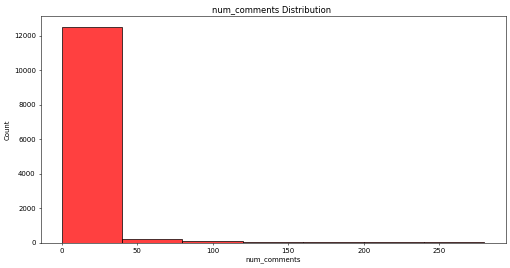

In [26]:
plt.figure(figsize=(12,6),dpi=50)
sns.histplot(data=df,bins=range(0, 300, 40), x="num_comments",color="red")
#sns.histplot(data=df,x="num_comments",color="red")
plt.title("num_comments Distribution ")
plt.show()

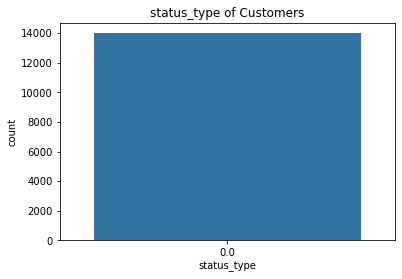

In [27]:
sns.countplot(data=df,x="status_type")
plt.title("status_type of Customers")
plt.show()


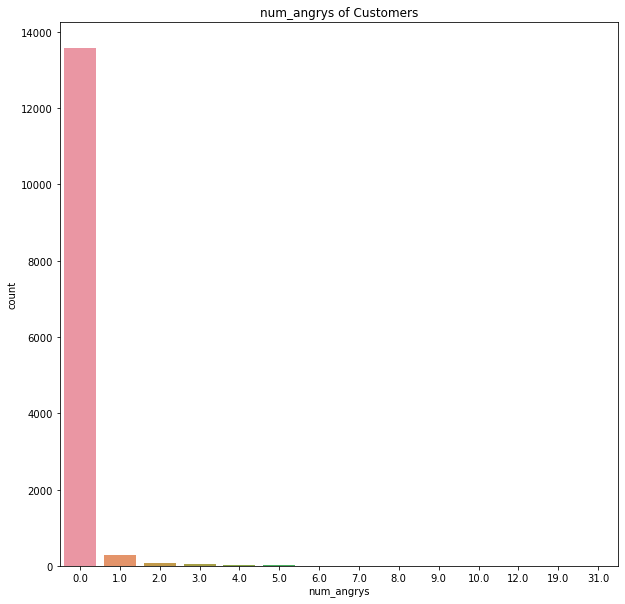

In [28]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)
sns.countplot(data=df,x="num_angrys")
plt.title("num_angrys of Customers")
plt.show()

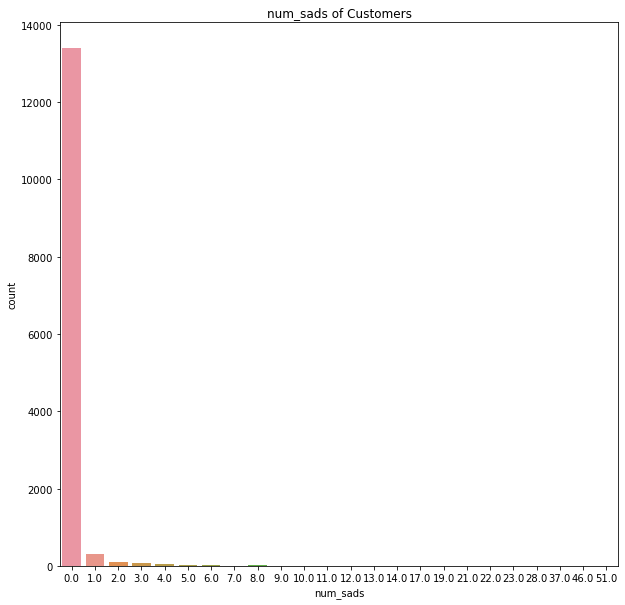

In [29]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)
sns.countplot(data=df,x="num_sads")
plt.title("num_sads of Customers")
plt.show()

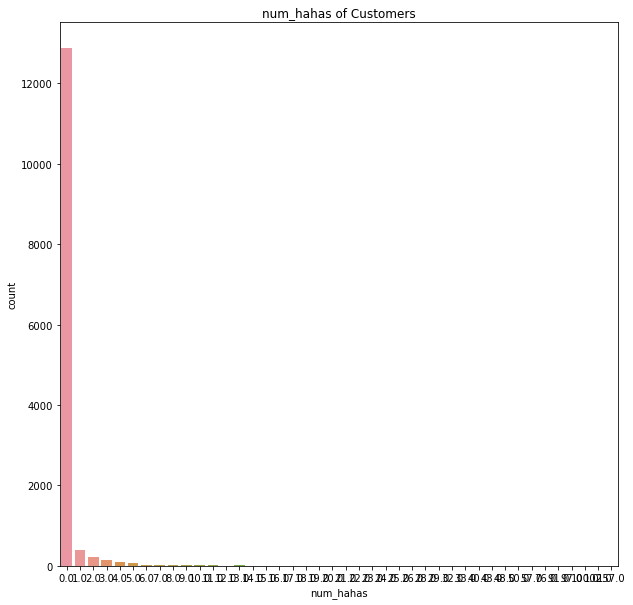

In [30]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)
sns.countplot(data=df,x="num_hahas")
plt.title("num_hahas of Customers")
plt.show()

# From above graphs we can see data is highly scattered hence we need to normalize this and scale it to use it properly

# In order to understand the relationships between features, we will make a heatmap of correlations

plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap=plt.cm.RdYlGn, annot=True)
c

# Lets scale the data

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
clustering_df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Lets try various Dendrogram for linkage like ward, single, average and complete

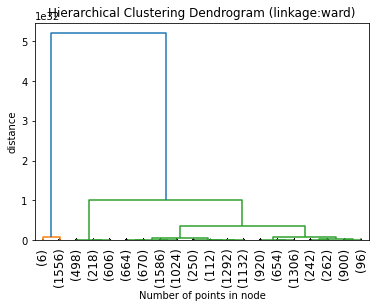

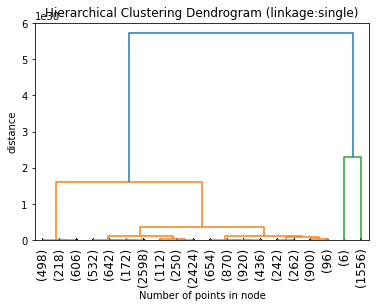

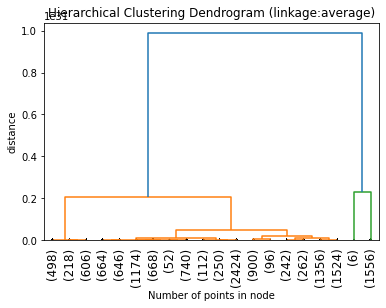

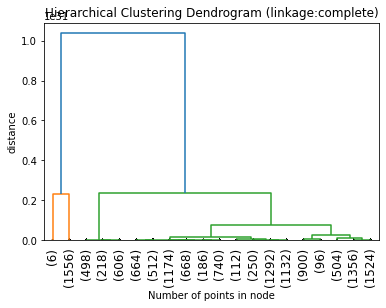

In [33]:
Z1 = linkage(df, 'ward')
Z2 = linkage(df, 'single')
Z3 = linkage(df, 'average')
Z4 = linkage(df, 'complete')

plt.title('Hierarchical Clustering Dendrogram (linkage:ward)')
plt.xlabel("Number of points in node")
plt.ylabel('distance')
dendrogram(
    Z1,  #entered Z1 for ward criteria
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    
)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (linkage:single)')
plt.xlabel("Number of points in node")
plt.ylabel('distance')
dendrogram(
    Z2,  #enter Z2 single linkage criterion
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    
)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (linkage:average)')
plt.xlabel("Number of points in node")
plt.ylabel('distance')
dendrogram(
    Z3,   #enter Z3 single average criterion
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    
)
plt.show()


plt.title('Hierarchical Clustering Dendrogram (linkage:complete)')
plt.xlabel("Number of points in node")
plt.ylabel('distance')
dendrogram(
    Z4, #enter Z3 single complete criterion
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    
)
plt.show()

# From above 4 dendogram we can go with 4 clusters initially then we will compare and narrow down it based on domain knowledge

# Now we will apply AgglomerativeClustering and check with diff  Linkage and affinity because it have a significant impact on the cluster solution. We can already see the graphical differences among the above four dendrograms representing four different linkage solutions . Now we can quantify, how the frequency of individual observations change with choices of linkage and affinity

In [34]:
model1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
model3 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
model4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')

model2.fit(clustering_df)
clustering_df['segmentation-clustering']=model2.labels_ #this is used for plotting later

#Predict and count numbers in each cluster
clus_solution1 = model1.fit_predict(clustering_df)
clus_solution2 = model2.fit_predict(clustering_df)
clus_solution3 = model3.fit_predict(clustering_df)
clus_solution4 = model4.fit_predict(clustering_df)

output1 = pd.DataFrame(data=clus_solution1)
output2 = pd.DataFrame(data=clus_solution2)
output3 = pd.DataFrame(data=clus_solution3)
output4 = pd.DataFrame(data=clus_solution4)

A=output1[0].value_counts(ascending=False)
B=output2[0].value_counts(ascending=False)
C=output3[0].value_counts(ascending=False)
D=output4[0].value_counts(ascending=False)

out=pd.concat([A,B,C,D], axis=1)
out.columns = ['ward', 'single', 'average', 'complete']
print(out)

    ward  single  average  complete
0  11356   12430    12430         2
3   1564       1        1       273
1    578    1562     1562     12157
2    496       1        1      1562


# The table below shows the number of individuals in each cluster . The clustering approach using ward linkage (model A) , single linkage model B, average linkage model C, complete linkage modle D all had four clusters.

# Model B- Single Linkage and Model C- average linkage giving exact same number of clusters. Majority of donors are in 2 cluster

# Modle A- ward linkage and Model D - complete are skewed but majority of donors are distributed in all 4 clusters

# Now lets try to ook at the role of the affinity metric in how pairs of observations are fused together. Affinity is the metric that is used to compute the linkage.  There are five different criteria are available in sklearn.cluster.AgglomerativeClustering: euclidean, l1, l2, manhattan and cosine. 
# The default is euclidean. As with the linkage criterion, the affinity criterion may also impact the clustering solution

In [35]:
model1_A = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model1_B = AgglomerativeClustering(n_clusters=4, affinity='l1', linkage='single')
model1_C = AgglomerativeClustering(n_clusters=4, affinity='l2', linkage='single')
model1_D = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='single')
model1_E = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='single')

clus_solution1_A = model1_A.fit_predict(clustering_df)
clus_solution1_B = model1_B.fit_predict(clustering_df)
clus_solution1_C = model1_C.fit_predict(clustering_df)
clus_solution1_D = model1_D.fit_predict(clustering_df)
clus_solution1_E = model1_E.fit_predict(clustering_df)

output1_A = pd.DataFrame(data=clus_solution1_A)
output1_B = pd.DataFrame(data=clus_solution1_B)
output1_C = pd.DataFrame(data=clus_solution1_C)
output1_D = pd.DataFrame(data=clus_solution1_D)
output1_E = pd.DataFrame(data=clus_solution1_E)

a=output1_A[0].value_counts(ascending=False)
b=output1_B[0].value_counts(ascending=False)
c=output1_C[0].value_counts(ascending=False)
d=output1_D[0].value_counts(ascending=False)
e=output1_E[0].value_counts(ascending=False)

out=pd.concat([a,b,c,d,e], axis=1)
out.columns = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
print(out)

   euclidean     l1     l2  manhattan  cosine
0      11356  12430  12430      12430   12429
3       1564      1      1          1       1
1        578   1562   1562       1562       2
2        496      1      1          1    1562


 # While the choice of affinity metric did not have a differential impact when the criterion was specified as euclidean, l1, l2 or manhattan, the segmentation solution was considerably same when the affinity metric was set to l1,l2, maanhattan and cosine

Text(0.5, 0, 'num_shares')

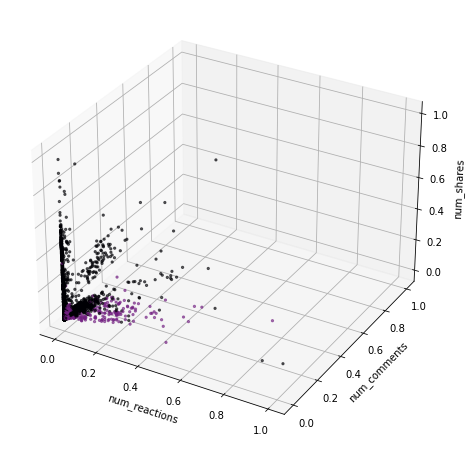

In [36]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Data for three-dimensional scattered points
zdata = clustering_df['num_reactions']
xdata = clustering_df['num_comments']
ydata = clustering_df['num_shares']
ax.scatter3D(xdata, ydata, zdata, s=5, alpha=0.6, c=clustering_df['segmentation-clustering'], cmap='magma');

ax.set_xlabel('num_reactions')
ax.set_ylabel('num_comments')
ax.set_zlabel('num_shares')

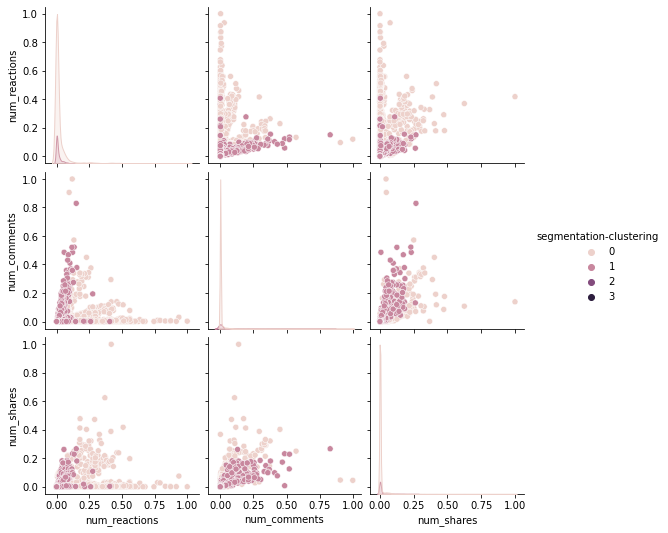

In [37]:
g = sns.pairplot(clustering_df, hue="segmentation-clustering", diag_kind="kde", vars=["num_reactions", "num_comments", "num_shares"])



After finding the best clustering obtained for your data, try to interpret some/all of the clusters and derive some domain-specific insights out of the results
- **The purpose of this assignment is to study the patterns in the clusters formed and determine the nature of the cluster's patterns.**
- It can be concluded that the cluster 0 has seller are in general less popular. In the other hand, the sellers of the cluster 1 have sellers that are super popular
- As we saw in the graph the sellers from cluster 0 have less shares and less likes than the sellers of the cluster 1
- In a different graph, the sellers of the cluster 0 independetly of the status type, always have less likes than the sellers of cluster 1
- In terms of number of interactions with the posts (wows, hahas, sads and angrys), the number of likes doesn't fluctuate much
- With respect to hour of the post, can clearly be seen that between 5:00 - 10:00 there is more interactions than any other time of the day
-We can either go with modle B or Model C with single or average Linkage. As both of them are returning similar output we can consider either one of them. i.e average or single linkage
- Segmentation 1 and 2 is better .
- When we evaluate affinity metric euclidean   is skwed, l1, l2, and manhattan    giving same output and cosine affinity giving better results.


